In [1]:
import pandas as pd #used for data manipulation
import numpy as np #used for numerical analysis
from collections import Counter as c # return counts
import seaborn as sns #used for data Visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error#model performance
import pickle #Python object hierarchy is converted into a byte stream,
from sklearn.linear_model import LinearRegression #Regresssion ML algorithm

In [3]:
data=pd.read_csv(r"C:\Users\ragha\OneDrive\Desktop\internship ml\FuelConsumptionCo2.csv")
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
data.head() #return you the first 5 rows values

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
data.tail() #return you the last 5 rows values

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [6]:
data.drop('MODEL',axis=1,inplace=True)  # drop is used for dropping the column

In [7]:
data

,MODELYEAR,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [8]:
data.columns #return all the column names

Index(['MODELYEAR', 'MAKE', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [10]:
data.columns=['Make','MODEL.1', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)','CO2_Emissions'] 
data.columns
# manually giving the name  of the columns

Index(['Make', 'MODEL.1', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions'],
      dtype='object')

In [11]:
data.info() #info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Make                             1067 non-null   int64  
 1   MODEL.1                          1067 non-null   object 
 2   Vehicle_Class                    1067 non-null   object 
 3   Engine_Size                      1067 non-null   float64
 4   Cylinders                        1067 non-null   int64  
 5   Transmission                     1067 non-null   object 
 6   Fuel_Type                        1067 non-null   object 
 7   Fuel_Consumption_City            1067 non-null   float64
 8   Fuel_Consumption_Hwy             1067 non-null   float64
 9   Fuel_Consumption_Comb(L/100 km)  1067 non-null   float64
 10  Fuel_Consumption_Comb(mpg)       1067 non-null   int64  
 11  CO2_Emissions                    1067 non-null   int64  
dtypes: float64(4), int64

In [12]:
data.describe()  # returns important values for continous column data

,Make,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb(L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([4, 4, 4], dtype=int64))

In [14]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['MODEL.1', 'Vehicle_Class', 'Transmission', 'Fuel_Type'],
      dtype=object)

In [15]:
for i in cat:
    print("Column :",i)
    print('count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column : MODEL.1
count of classes :  39
Counter({'FORD': 90, 'CHEVROLET': 86, 'BMW': 64, 'MERCEDES-BENZ': 59, 'AUDI': 49, 'GMC': 49, 'TOYOTA': 49, 'PORSCHE': 44, 'VOLKSWAGEN': 42, 'DODGE': 39, 'MINI': 36, 'KIA': 33, 'NISSAN': 33, 'CADILLAC': 32, 'JEEP': 31, 'MAZDA': 27, 'HYUNDAI': 24, 'SUBARU': 23, 'JAGUAR': 22, 'LEXUS': 22, 'HONDA': 21, 'INFINITI': 21, 'CHRYSLER': 19, 'LAND ROVER': 19, 'BUICK': 16, 'MITSUBISHI': 16, 'RAM': 13, 'ACURA': 12, 'LINCOLN': 11, 'VOLVO': 11, 'FIAT': 10, 'SCION': 9, 'BENTLEY': 8, 'ASTON MARTIN': 7, 'ROLLS-ROYCE': 7, 'MASERATI': 6, 'LAMBORGHINI': 3, 'SMART': 2, 'SRT': 2})
************************************************************************************************************************
Column : Vehicle_Class
count of classes :  16
Counter({'MID-SIZE': 178, 'COMPACT': 172, 'SUV - SMALL': 154, 'SUV - STANDARD': 110, 'FULL-SIZE': 86, 'TWO-SEATER': 71, 'SUBCOMPACT': 65, 'PICKUP TRUCK - STANDARD': 62, 'MINICOMPACT': 47, 'STATION WAGON - SMALL': 36, 'VAN - PASSE

In [16]:
#here we are combininng the similar types of class into one class using where is for find
#and isin is for used for checking purpose
data["Transmission"] = np.where(data["Transmission"].isin(["A4", "A5", "A3"]), "Automatic", data["Transmission"])
data["Transmission"] = np.where(data["Transmission"].isin(["M5", "M6"]), "Manual", data["Transmission"])
data["Transmission"] = np.where(data["Transmission"].isin(["AS4", "AS5"]), "Automatic with Select Shift", data["Transmission"])
data["Transmission"] = np.where(data["Transmission"].isin(["AV"]), "Continuously Variable", data["Transmission"])
c(data['Transmission'])

Counter({'Automatic with Select Shift': 11,
         'Manual': 189,
         'AV7': 5,
         'AS6': 189,
         'A6': 222,
         'AM7': 34,
         'AV8': 3,
         'AS8': 80,
         'A7': 12,
         'A8': 87,
         'M7': 9,
         'Automatic': 75,
         'Continuously Variable': 46,
         'AM6': 6,
         'AS7': 76,
         'A9': 8,
         'AS9': 2,
         'AV6': 11,
         'AM5': 2})

In [17]:
data["Fuel_Type"] = np.where(data["Fuel_Type"]=="Z", "Premium Gasoline", data["Fuel_Type"])
data["Fuel_Type"] = np.where(data["Fuel_Type"]=="X", "Regular Gasoline", data["Fuel_Type"])
data["Fuel_Type"] = np.where(data["Fuel_Type"]=="D", "Diesel", data["Fuel_Type"])
data["Fuel_Type"] = np.where(data["Fuel_Type"]=="E", "Ethanol(E85)", data["Fuel_Type"])
data["Fuel_Type"] = np.where(data["Fuel_Type"]=="N", "Natural Gas", data["Fuel_Type"])
c(data["Fuel_Type"])

Counter({'Premium Gasoline': 434,
         'Diesel': 27,
         'Regular Gasoline': 514,
         'Ethanol(E85)': 92})

In [18]:
data.dtypes[data.dtypes!='O'].index.values

array(['Make', 'Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions'], dtype=object)

In [19]:
data.isnull().any()#it will return true if any columns is having null values

Make                               False
MODEL.1                            False
Vehicle_Class                      False
Engine_Size                        False
Cylinders                          False
Transmission                       False
Fuel_Type                          False
Fuel_Consumption_City              False
Fuel_Consumption_Hwy               False
Fuel_Consumption_Comb(L/100 km)    False
Fuel_Consumption_Comb(mpg)         False
CO2_Emissions                      False
dtype: bool

In [20]:
data.isnull().sum() #used for finding the null values

Make                               0
MODEL.1                            0
Vehicle_Class                      0
Engine_Size                        0
Cylinders                          0
Transmission                       0
Fuel_Type                          0
Fuel_Consumption_City              0
Fuel_Consumption_Hwy               0
Fuel_Consumption_Comb(L/100 km)    0
Fuel_Consumption_Comb(mpg)         0
CO2_Emissions                      0
dtype: int64

<AxesSubplot:>

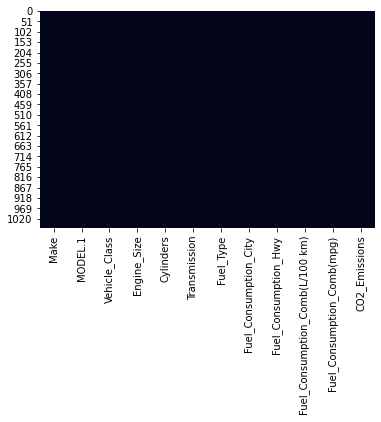

In [21]:
sns.heatmap(data.isnull(),cbar=False)

In [22]:
data1=data.copy()
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
x='*'
for i in cat:#looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()#creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LE.fit_transform(data[i]) # trannsforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print(x*100)

LABEL ENCODING OF: MODEL.1
Counter({'FORD': 90, 'CHEVROLET': 86, 'BMW': 64, 'MERCEDES-BENZ': 59, 'AUDI': 49, 'GMC': 49, 'TOYOTA': 49, 'PORSCHE': 44, 'VOLKSWAGEN': 42, 'DODGE': 39, 'MINI': 36, 'KIA': 33, 'NISSAN': 33, 'CADILLAC': 32, 'JEEP': 31, 'MAZDA': 27, 'HYUNDAI': 24, 'SUBARU': 23, 'JAGUAR': 22, 'LEXUS': 22, 'HONDA': 21, 'INFINITI': 21, 'CHRYSLER': 19, 'LAND ROVER': 19, 'BUICK': 16, 'MITSUBISHI': 16, 'RAM': 13, 'ACURA': 12, 'LINCOLN': 11, 'VOLVO': 11, 'FIAT': 10, 'SCION': 9, 'BENTLEY': 8, 'ASTON MARTIN': 7, 'ROLLS-ROYCE': 7, 'MASERATI': 6, 'LAMBORGHINI': 3, 'SMART': 2, 'SRT': 2})
Counter({11: 90, 7: 86, 4: 64, 25: 59, 2: 49, 12: 49, 36: 49, 29: 44, 37: 42, 9: 39, 26: 36, 18: 33, 28: 33, 6: 32, 17: 31, 24: 27, 14: 24, 35: 23, 16: 22, 21: 22, 13: 21, 15: 21, 8: 19, 20: 19, 5: 16, 27: 16, 30: 13, 0: 12, 22: 11, 38: 11, 10: 10, 32: 9, 3: 8, 1: 7, 31: 7, 23: 6, 19: 3, 33: 2, 34: 2})
****************************************************************************************************
LABE

<AxesSubplot:xlabel='Vehicle_Class', ylabel='CO2_Emissions'>

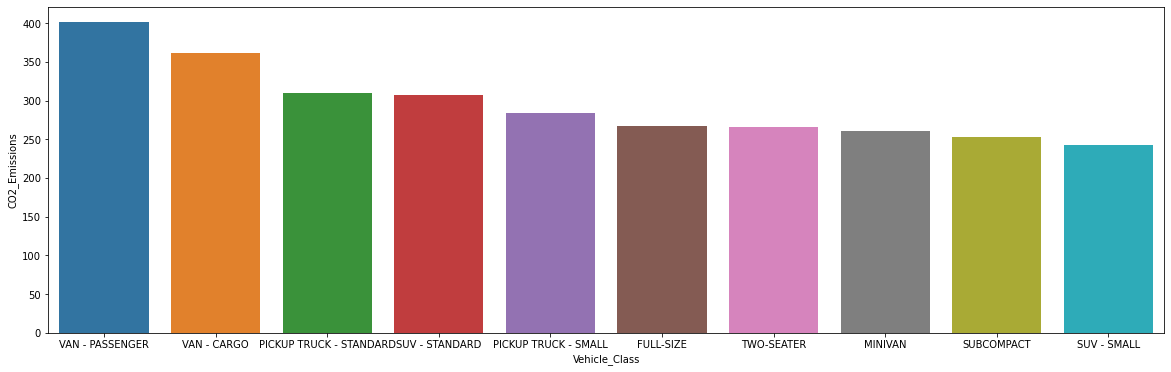

In [24]:
a=data1.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='Vehicle_Class',y='CO2_Emissions',data=a)

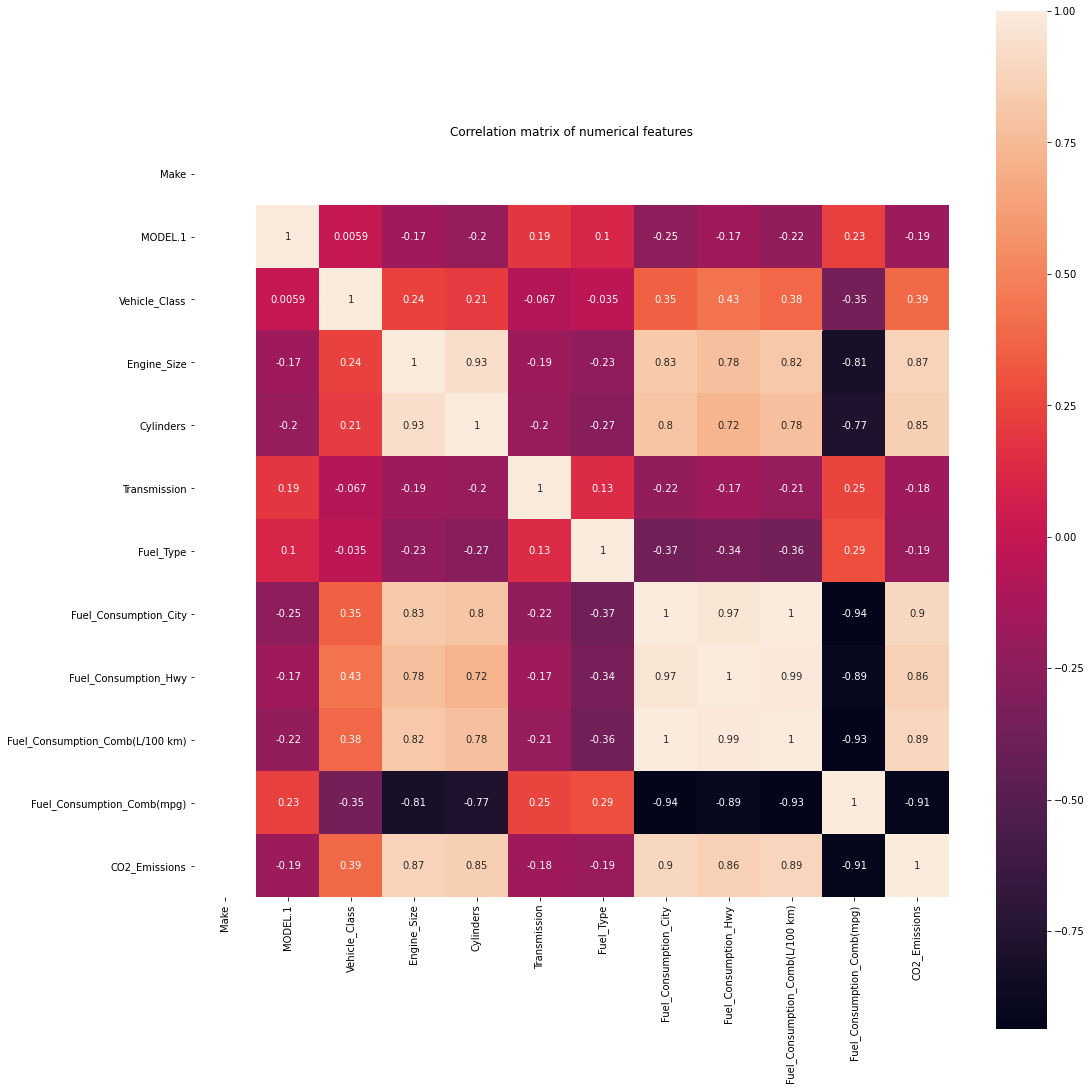

In [25]:
corr = data.corr() #perform correlation between all continous features
plt.subplots(figsize=(16,16));
sns.heatmap(corr, annot=True, square=True) #plotting heatmap of correlations
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

<AxesSubplot:>

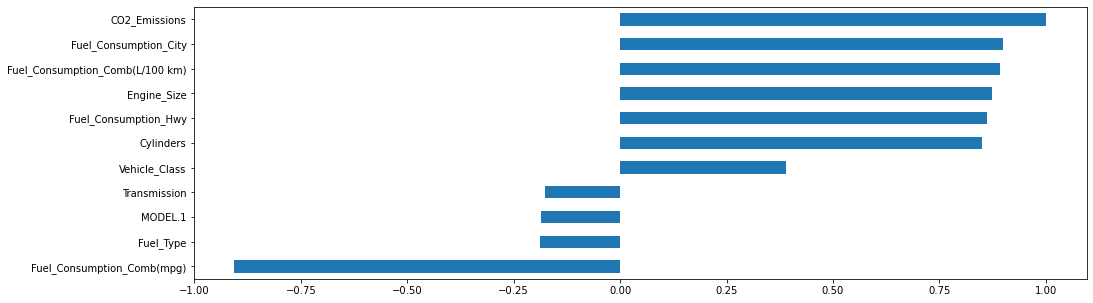

In [26]:
plt.figure(figsize=(16,5))
corr["CO2_Emissions"].sort_values(ascending=True)[:-1].plot(kind="barh")

In [27]:
x = data.drop(['CO2_Emissions','Fuel_Consumption_Comb(L/100 km)','MODEL.1'],axis=1) #independet features
x=pd.DataFrame(x)
y = data['CO2_Emissions'] #depenent feature
y=pd.DataFrame(y)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)

(853, 9)
(214, 9)


In [29]:
lr=LinearRegression() #creating object of LinearRegression model
lr=lr.fit(x_train,y_train) # fitting our model

In [30]:
y_pred=lr.predict(x_test)
y_pred

array([[309.70283891],
       [253.23659022],
       [300.35527151],
       [223.65577607],
       [175.09212605],
       [168.54309711],
       [317.8067569 ],
       [347.04620586],
       [327.03785746],
       [266.9292123 ],
       [218.54147866],
       [196.08355084],
       [311.32921839],
       [254.83382506],
       [325.42914127],
       [265.50263497],
       [302.01768474],
       [191.36595514],
       [204.42533501],
       [400.07508245],
       [220.98792978],
       [168.96777095],
       [309.70283891],
       [178.3404632 ],
       [218.02436425],
       [387.86337568],
       [268.20124938],
       [266.59668457],
       [255.09444438],
       [217.66191721],
       [289.09443181],
       [273.55280389],
       [262.73369119],
       [303.862277  ],
       [370.43221422],
       [234.50407719],
       [199.44754173],
       [183.63914962],
       [220.93332646],
       [375.00871892],
       [207.71345115],
       [304.79127543],
       [189.63891888],
       [239

In [31]:
score = lr.score(x_test,y_test)
score

0.9208557205135326

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

<ipython-input-33-a74d4705cb4a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestRegressor()

In [38]:
rfr.score(x_test,y_test)

0.9873366042814825